#  Analysis of the cleanded and enriched dataset

With the cleaned list now we are going to analyze the properties of the top 500 albums with the additiona information gathered from the Spotify and Wikipedia APIs.

First we are going to import the libraries that we are going to need for the analysis.


In [1]:
from analysis_functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
top500 = pd.read_csv('../dataset/albumlist_clean.csv')
top500.head(5)

,Number,year,album,artist,genre,subgenre,features,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,wiki_views_album,wiki_views_artist
0,1,1967,Sgt. Peppers Lonely Hearts Club Band,The Beatles,['Rock'],"['Rock & Roll', 'Psychedelic Rock']","{'danceability': 0.451, 'energy': 0.457, 'loud...",0.451,0.457,-9.8650,0.0451,0.3380,0.000008,0.1390,0.5830,112.984,0.0,91096.5
1,2,1966,Pet Sounds,The Beach Boys,['Rock'],"['Pop Rock', 'Psychedelic Rock']","{'danceability': 0.43, 'energy': 0.434, 'loudn...",0.430,0.434,-7.9650,0.0335,0.5130,0.000008,0.1420,0.3640,116.668,2281.0,10595.5
2,3,1966,Revolver,The Beatles,['Rock'],"['Psychedelic Rock', 'Pop Rock']","{'danceability': 0.538, 'energy': 0.5609999999...",0.538,0.561,-8.1825,0.0386,0.1825,0.000007,0.1355,0.6335,130.041,222.0,91096.5
3,4,1965,Highway 61 Revisited,Bob Dylan,['Rock'],"['Folk Rock', 'Blues Rock']","{'danceability': 0.483, 'energy': 0.691, 'loud...",0.483,0.691,-6.9410,0.0320,0.7020,0.000000,0.2620,0.5910,99.500,1004.0,29581.5
4,5,1965,Rubber Soul,The Beatles,"['Rock', 'Pop']",['Pop Rock'],"{'danceability': 0.563, 'energy': 0.567, 'loud...",0.563,0.567,-9.2730,0.0379,0.0371,0.000000,0.0943,0.6720,121.402,4294.5,91096.5


First of all we represent the histogram of the year of publication of each album that reached the top 500. We see that the bulk of the albums are from around the 70's.

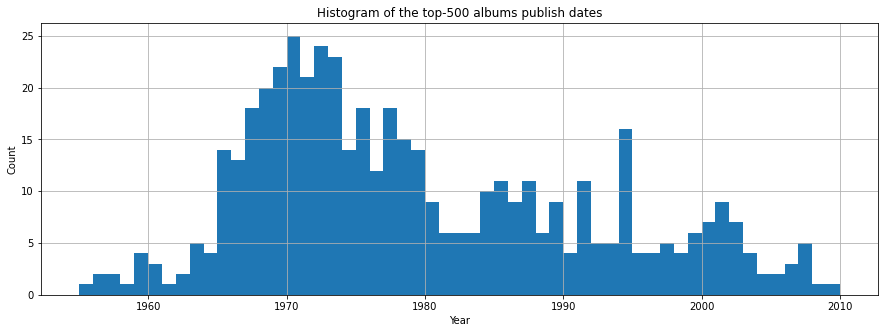

In [3]:
bins=np.arange(min(top500["year"]),max(top500["year"]))
plt.figure(figsize=(15,5))
plt.hist(top500["year"],bins=bins)
plt.title("Histogram of the top-500 albums publish dates")
plt.ylabel("Count")
plt.xlabel("Year")
plt.grid(True)
plt.show()

Importing the clea CSV destroyed the lists, so we are forced to do a second round of cleaning and dividing the generes and subgeneres in the ablums that have 2 or more. This is easily done with a lambda function.

In [4]:
spliting = lambda x: x.replace("'","").replace("[","").replace("]","").replace(" ","").replace("&C","C").split(",")
top500["genre"]=top500["genre"].apply(spliting)
top500["subgenre"]=top500["subgenre"].apply(spliting)

Now let's take a look at how many times each genre appears in the top 500 albums. We see that the rock category appears in almost half of the list.

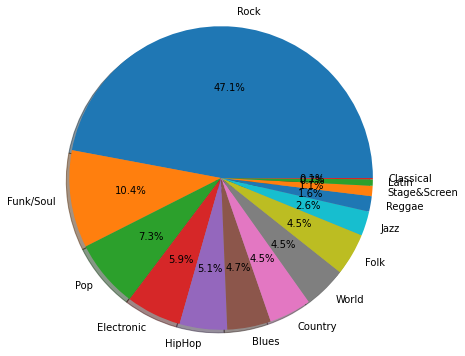

In [5]:
genre = word_count(top500["genre"])

explode = np.zeros(len(genre))
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(genre.values/sum(genre), explode=explode, 
        labels=genre.index, autopct='%1.1f%%',shadow=True, startangle=0)
ax1.axis('equal')  
plt.show()

We are going to ckeck if this has some kind of evolution in time, and rock have more presence at the time of the bulk of the albums in the histogram. We represent pie charts dividing albums before and after the 90's. Even though the rock albums have more presence before the 90's, afther that threshold it is still the most populated category.

<ipython-input-6-6759325b9d73>:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1[1].pie(genre.values/sum(genre),


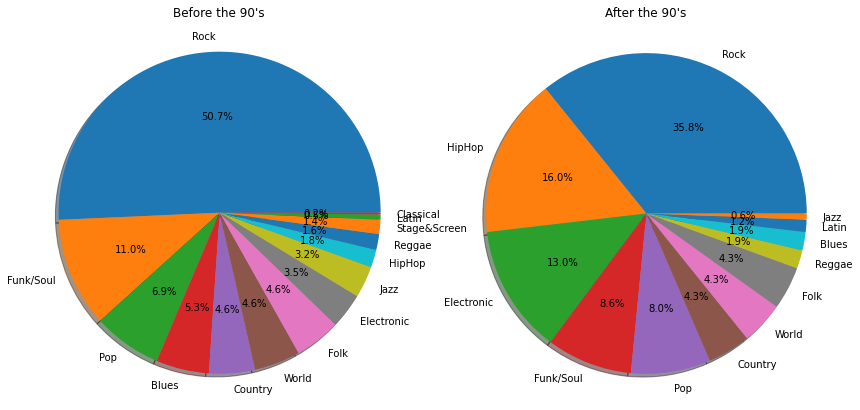

In [6]:
fig1, ax1 = plt.subplots(1,2,figsize=(14,7))
#Computing before 1990
genre = word_count(top500[top500["year"] < 1990]["genre"])
ax1[0].pie(genre.values/sum(genre),
        labels=genre.index, autopct='%1.1f%%',shadow=True, startangle=0)
ax1[0].axis('equal') 
ax1[0].set_title("Before the 90's")
#Computing after 1990
genre = word_count(top500[top500["year"] > 1990]["genre"])
ax1[1].pie(genre.values/sum(genre),  
        labels=genre.index, autopct='%1.1f%%',shadow=True, startangle=0)
ax1[1].axis('equal') 
ax1[1].set_title("After the 90's")
#Show plot
plt.show()

Among the top-20 subcategories in the best 500 albums, the presence of rock variants still dominates the bar plot, but there are as well other subgenres such as disco, country or soul.

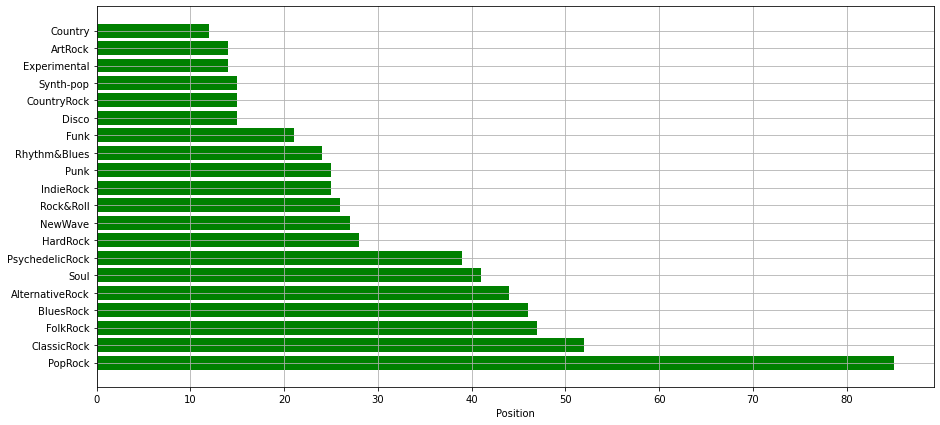

In [7]:
subgenre=word_count(top500["subgenre"])

plt.figure(figsize=(15,7))
plt.grid(True)
plt.xlabel("Position")
plt.barh(subgenre[subgenre.index != "None"][:20].index,
         subgenre[subgenre.index != "None"][:20].values,
         color="green")
plt.show()

Now let's check all the artists that managed to get 5 or more albums in the list. We find 10 artist that meet this condition, so we plot a bar chart with these top-10 artists.

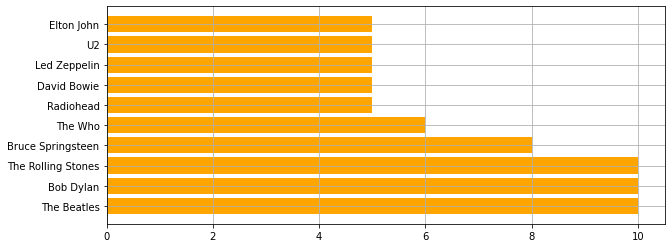

In [8]:
top_artist = top500["artist"].value_counts()
plt.figure(figsize=(10,4))
plt.grid(True)
plt.barh(top_artist[top_artist.values>4].index,
         top_artist[top_artist.values>4].values, 
         color="orange")
plt.show()

## Analysis of the musical features of the top-500 albums using the Spotify's API

Tracks in the spotify catalogue have listed a series of features that describes each song. Using this valuable information 

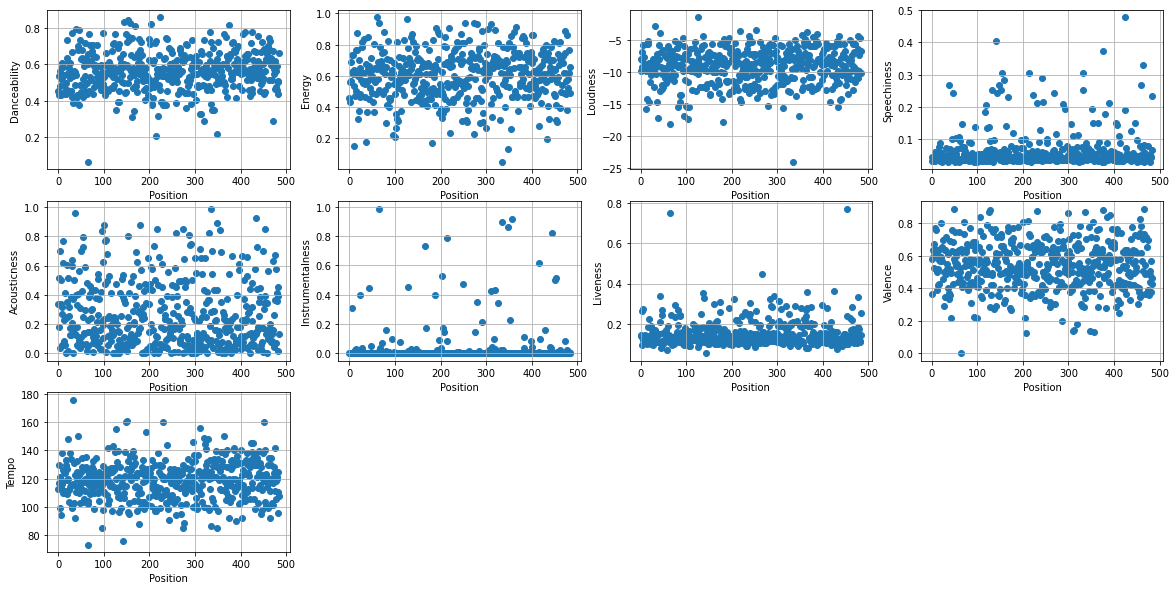

In [18]:
features = ['danceability', 'energy',  'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(20,17))
for i in range(len(features)):
    plt.subplot( len(features)//2+1,len(features)//2, i+1)
    plt.ylabel(features[i].capitalize())
    plt.xlabel("Position")
    plt.grid(True)
    plt.scatter( top500.index, top500[features[i]] )
plt.show()

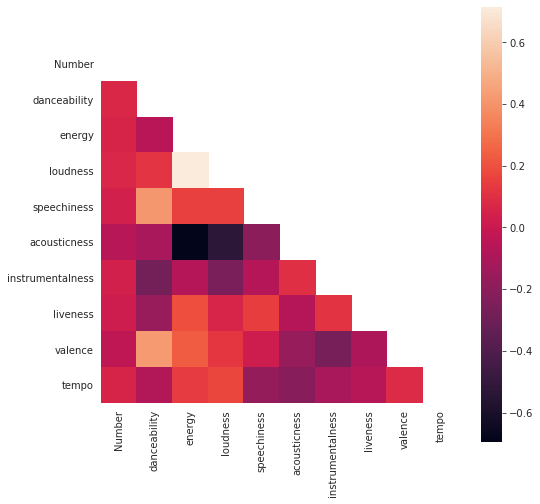

In [10]:
features = ['Number','danceability', 'energy',  'loudness', 
            'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
#Obtaining the correlation matrix
cor_matrix = top500[features].corr(method="pearson")
#Creating a mask to not to plot the main diagonal and repeated coeficients.
#This is, to plot only "a triangle" of the matrix 
mask = np.zeros_like(cor_matrix)
mask[np.triu_indices_from(mask)] = True
#Plot the matrix using a heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(cor_matrix, mask=mask, square=True)
plt.show()

In [11]:
print("Number of albums with Wikipedia reads info: ",len(top500[top500["wiki_views_album"] > 0]))
print("Number of artists with Wikipedia reads info: ",len(top500[top500["wiki_views_artist"] > 0]))

Number of albums with Wikipedia reads info:  370
Number of artists with Wikipedia reads info:  462


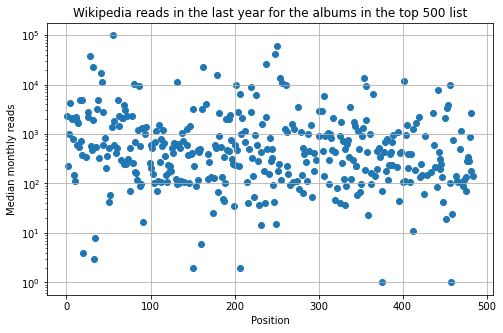

In [12]:

wiki_album=top500[top500["wiki_views_album"] > 0]["wiki_views_album"]

plt.figure(figsize=(8,5))
plt.title("Wikipedia reads in the last year for the albums in the top 500 list")
plt.grid(True)
plt.yscale("log")
plt.ylabel("Median monthly reads")
plt.xlabel("Position")
plt.scatter( wiki_album.index, wiki_album )
plt.show()

In [13]:
wiki_artist={artist:top500[top500["artist"]==artist]["wiki_views_artist"].mean()
            for artist in top_artist[top_artist.values>4].index}

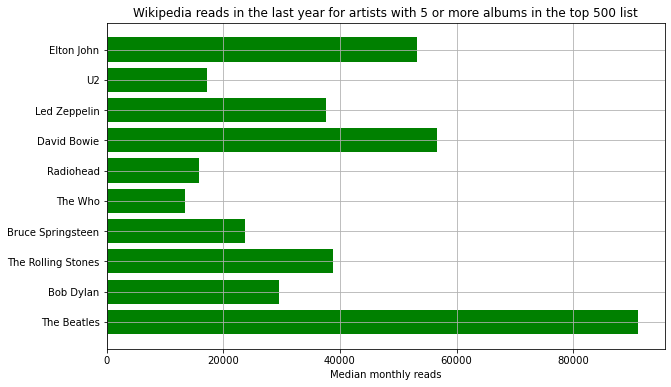

In [14]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.title("Wikipedia reads in the last year for artists with 5 or more albums in the top 500 list")
plt.xlabel("Median monthly reads")
plt.barh(list(wiki_artist.keys()),list(wiki_artist.values()),
         color="green")
plt.show()